In [111]:
import pandas as pd
import numpy as np

import sys
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Features = pd.read_csv('/content/drive/MyDrive/features_dataset.csv')
Features.head()
# Features.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,labels
0,0,0.272267,0.689451,0.708028,0.666473,0.715468,0.694820,0.627661,0.632560,0.687715,0.712157,0.706116,0.696561,0.666424,-505.009247,64.000099,-2.749660,16.950371,-1.089467,-2.046432,-7.829981,-8.716751,-19.273317,-5.294091,-5.584455,-5.783628,-1.870991,-7.146638,-3.675263,-0.451763,-11.253410,-3.521277,-3.482842,-5.802355,0.000036,0.000173,0.001309,0.018095,0.134511,0.229614,...,0.000877,0.001587,0.001460,0.001960,0.001981,0.002306,0.001958,0.002031,0.001465,0.001945,0.003857,0.003231,0.002353,0.003053,0.002795,0.002131,0.001839,0.001425,0.000817,0.000714,0.000658,0.001076,0.001073,0.001062,0.000639,0.000917,0.001054,0.001587,0.001744,0.001006,0.000687,0.000502,0.000372,0.000197,0.000137,0.000288,0.000349,0.000143,1.498768e-05,angry
1,1,0.262035,0.603476,0.668302,0.692199,0.709884,0.658301,0.605176,0.609343,0.640842,0.689348,0.702884,0.687124,0.663653,-626.262817,93.897247,-0.691273,17.833763,9.502007,2.030928,-2.721135,-8.514406,-12.427499,-6.575863,-0.015912,-2.750585,0.777975,-5.365466,-0.337154,1.482861,-8.703282,-2.764846,-1.618086,-1.523441,0.000006,0.000112,0.008725,0.090577,0.060794,0.002684,...,0.000047,0.000038,0.000055,0.000098,0.000262,0.000406,0.000398,0.000671,0.000650,0.000318,0.000125,0.000135,0.000105,0.000093,0.000109,0.000126,0.000105,0.000053,0.000051,0.000034,0.000027,0.000021,0.000018,0.000045,0.000044,0.000020,0.000010,0.000004,0.000004,0.000004,0.000009,0.000012,0.000028,0.000034,0.000036,0.000035,0.000032,0.000011,8.432723e-07,calm
2,2,0.195466,0.628032,0.687169,0.651985,0.621273,0.604192,0.640623,0.626136,0.652430,0.685134,0.653014,0.649654,0.632400,-535.881226,82.281357,-9.010551,20.842283,5.421832,-3.754339,-10.541499,-13.465772,-27.917681,-6.894572,-3.809465,-10.429282,0.157545,-7.953777,-6.011678,2.456674,-10.448029,-6.485257,-4.687830,-3.553447,0.000002,0.000024,0.000490,0.016251,0.110550,0.186236,...,0.000099,0.000113,0.000261,0.000204,0.000287,0.000270,0.000436,0.000757,0.000782,0.000723,0.000844,0.000456,0.000389,0.000483,0.000514,0.000573,0.000368,0.000192,0.000170,0.000132,0.000084,0.000055,0.000057,0.000076,0.000062,0.000061,0.000051,0.000046,0.000052,0.000076,0.000086,0.000107,0.000061,0.000052,0.000059,0.000095,0.000090,0.000031,2.326331e-06,sad
3,3,0.173769,0.720864,0.685492,0.655122,0.652557,0.587786,0.550012,0.638170,0.707171,0.648498,0.604207,0.638241,0.707306,-526.520569,84.466164,-6.822329,22.756920,8.021371,-0.836710,-6.375116,-13.950517,-15.801805,-1.701238,-3.240356,-2.120920,-1.001574,-5.576652,-0.277861,0.180505,-5.214784,-4.889361,-1.206443,2.497521,0.000392,0.000137,0.001436,0.052773,0.284222,0.078999,...,0.000138,0.000183,0.000524,0.000483,0.000608,0.000806,0.001164,0.001016,0.001356,0.000967,0.000642,0.000433,0.000357,0.000369,0.000310,0.000320,0.000237,0.000182,0.000108,0.000086,0.000088,0.000081,0.000059,0.000119,0.000216,0.000222,0.000176,0.000146,0.000119,0.000097,0.000064,0.000051,0.000074,0.000129,0.000198,0.000243,0.000190,0.000074,4.691918e-06,fear
4,4,0.207284,0.692981,0.737456,0.726056,0.685032,0.636497,0.568223,0.528898,0.598124,0.635435,0.643268,0.671737,0.665797,-591.298523,92.935883,-4.376369,22.136271,9.728477,-3.868228,-4.231765,-12.517565,-17.417633,-6.273466,-7.159021,-2.124696,-2.085358,-9.489192,-3.802913,-1.608241,-9.055273,-6.693238,-5.338201,-0.922801,0.000002,0.000040,0.001787,0.018344,0.063987,0.039720,...,0.000034,0.000046,0.000155,0.000217,0.000380,0.000631,0.000542,0.000424,0.000528,0.000116,0.000108,0.000090,0.000116,0.000120,0.000075,0.000052,0.000053,0.000021,0.000012,0.000009,0.000007,0.000007,0.000008,0.000009,0.000008,0.000008,0.000008,0.000004,0.000006,0.000010,0.000018,0.000014,0.000014,0.000005,0.000007,0.000011,0.000016,0.000008,4.218449e-07,sad


In [113]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [114]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [115]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [116]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, shuffle=True, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 162), (1080, 8), (360, 162), (360, 8))

In [117]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 162), (1080, 8), (360, 162), (360, 8))

In [118]:
print('Train dimension:')
print(x_train.shape)
print('Test dimension:')
print(x_test.shape)

print('Train labels dimension:')
print(y_train.shape)
print('Test labels dimension:')
print(y_test.shape)

Train dimension:
(1080, 162)
Test dimension:
(360, 162)
Train labels dimension:
(1080, 8)
Test labels dimension:
(360, 8)


In [119]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

print((x_train.shape,y_test.shape))

((1080, 162, 1), (360, 8))


In [120]:
# LSTM Classifier
import keras
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2

from tensorflow.keras import layers,regularizers,models
from tensorflow import keras

In [121]:
# model = Sequential()
# model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(128,dropout=0.4, recurrent_dropout=0.2, return_sequences=True))

# model.add(Dense(64))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))

# # model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
# model.add(Flatten())
# model.add(Dense(8))
# model.add(Activation('softmax'))

model = Sequential()
model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Flatten())

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(32))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))


model.add(Dense(8))
model.add(Activation('softmax'))


# model = models.Sequential([
#         layers.BatchNormalization(input_shape=(x_train.shape[1], 1)),
#         layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
#         layers.Dropout(0.2),
#         layers.BatchNormalization(),
#         layers.Dense(8,activation='softmax'),
# ])

# opt = keras.optimizers.Adam(learning_rate=0.001)
# Configures the model for training
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 162, 1)            4         
_________________________________________________________________
lstm_26 (LSTM)               (None, 162, 256)          264192    
_________________________________________________________________
dropout_21 (Dropout)         (None, 162, 256)          0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 162, 32)           36992     
_________________________________________________________________
dropout_22 (Dropout)         (None, 162, 32)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 162, 32)           8320      
_________________________________________________________________
batch_normalization_20 (Batc (None, 162, 32)          

In [122]:
# Training the model
history=model.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/200
34/34 [==============================] - 13s 194ms/step - loss: 2.6029 - accuracy: 0.2187 - val_loss: 2.0089 - val_accuracy: 0.1833
Epoch 2/200
34/34 [==============================] - 5s 147ms/step - loss: 1.7903 - accuracy: 0.3338 - val_loss: 1.9984 - val_accuracy: 0.1389
Epoch 3/200
34/34 [==============================] - 5s 145ms/step - loss: 1.7064 - accuracy: 0.3744 - val_loss: 2.0064 - val_accuracy: 0.1528
Epoch 4/200
34/34 [==============================] - 5s 143ms/step - loss: 1.6164 - accuracy: 0.4042 - val_loss: 1.9918 - val_accuracy: 0.1278
Epoch 5/200
34/34 [==============================] - 5s 142ms/step - loss: 1.5660 - accuracy: 0.4256 - val_loss: 1.9626 - val_accuracy: 0.1278
Epoch 6/200
34/34 [==============================] - 5s 142ms/step - loss: 1.5443 - accuracy: 0.4423 - val_loss: 1.9435 - val_accuracy: 0.1639
Epoch 7/200
34/34 [==============================] - 5s 141ms/step - loss: 1.4501 - accuracy: 0.4798 - val_loss: 1.8855 - val_accuracy: 0.205

12/12 [==============================] - 1s 53ms/step - loss: 4.0809 - accuracy: 0.5806
Accuracy of our model on test data :  58.05555582046509 %


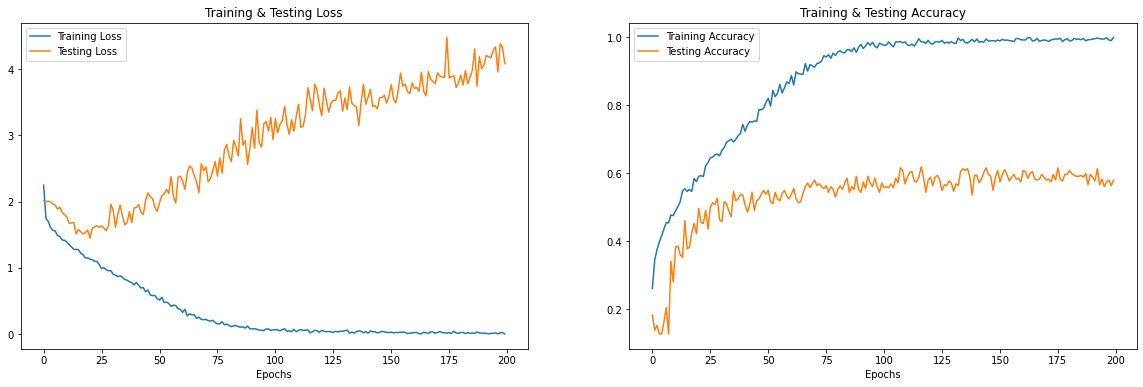

In [123]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()